# [AHA! Activity Health Analytics](http://casas.wsu.edu/)
[Center for Advanced Studies of Adaptive Systems (CASAS)](http://casas.wsu.edu/)

[Washington State University](https://wsu.edu)
# L6 Aggregation Visualization

## Learner Objectives
At the conclusion of this lesson, participants should have an understanding of:
* Performing data aggregation
* Computing summary statistics

## Acknowledgments
Content used in this lesson is based upon information in the following sources:
* [Pandas website](http://pandas.pydata.org/)
* Python for Data Analysis by Wes McKinney

## Data Aggregation Visualization
We are going to continue working with the [pd_hoa_activities_cleaned.csv](https://raw.githubusercontent.com/gsprint23/aha/master/lessons/files/pd_hoa_activities_cleaned.csv) dataset. Let's load the data into a data frame and re-create our class groups.

In [1]:
import pandas as pd
import numpy as np

fname = r"files\pd_hoa_activities_cleaned.csv"
df = pd.read_csv(fname, header=0, index_col=[0, 1])
classes = df.groupby("class")

Now that we have our two population groups, HOA and PD, let's create plots to visualize the distributions of the various task durations of each group. For each task, we will need two distributions, one for HOA and one for PD:

In [2]:
task_distributions = {}
# for each task
for task_name in set(df.index.get_level_values("task")):
    distributions = {}
    # for each class (PD, HOA) and associated class dataframe
    for class_name, cls_df in classes:
        # get a series representing every participant's duration for this task in this class
        # index is pid, value is pid's duration
        distribution = cls_df.xs(task_name, level="task")["duration"]
        # save the series (value) with the class label (key)
        distributions[class_name] = distribution
    task_distributions[task_name] = distributions

## Box Plot
Let's first make a box and whisker plot to show the distribution of each population's task duration. We will also be able to see if there any outliers with this plot.

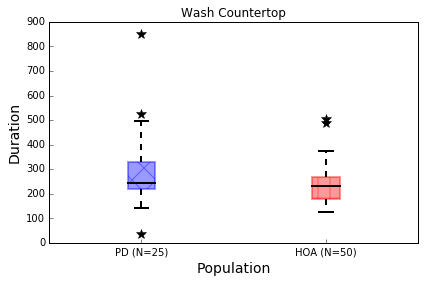

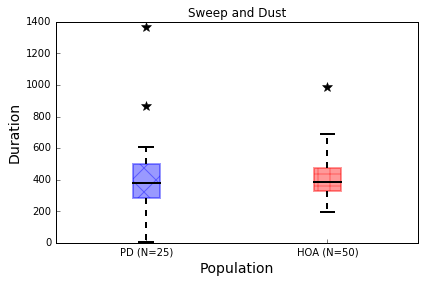

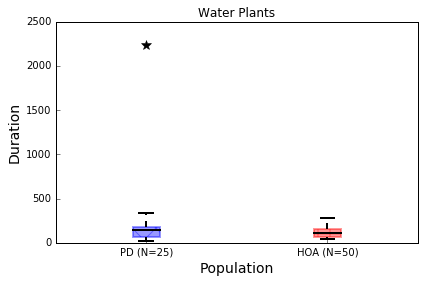

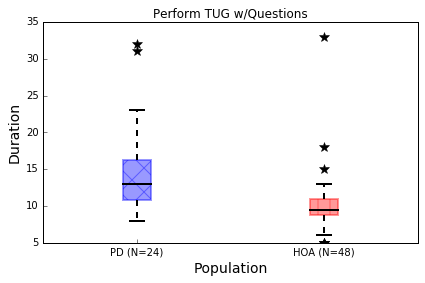

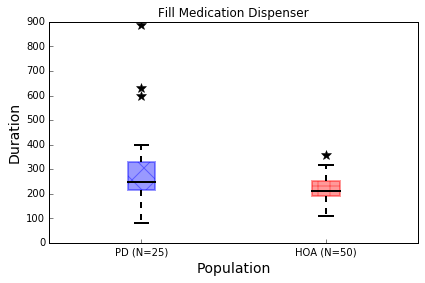

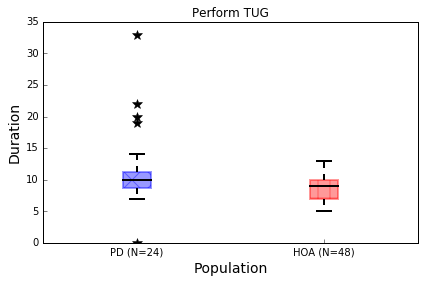

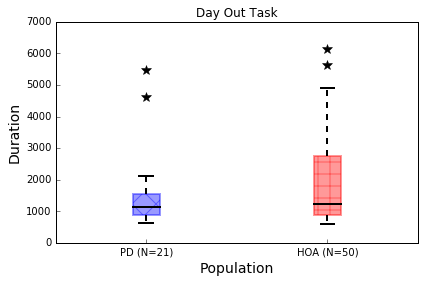

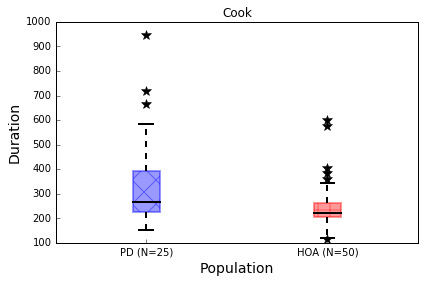

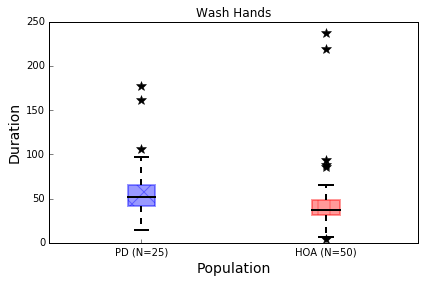

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_box_whisker(task_name, distros):
    '''
    
    '''
    colors = ['blue', 'red', 'orange']
    patterns = ('x', '+', '-', '\\', '.', 'o', 'O', '*')
    flierprops = dict(marker='*', markerfacecolor='black', markersize=10, linestyle='none', markeredgecolor='black')
    xticklabs = []
    data = []
    fig = plt.figure()
    ax = fig.add_subplot(111)
    title = task_name

    for pop_name, ser in distros.items():
        xticklabs.append("%s (N=%d)" %(pop_name, len(ser)))
        data.append(ser.astype(np.float).tolist())

    bp = ax.boxplot(data, patch_artist=True, flierprops=flierprops, sym='*')
    ax.set_xticklabels(xticklabs)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.xlabel("Population", fontsize=14)#, fontweight='bold')
    plt.ylabel("Duration", fontsize=14)#, fontweight='bold')
    
    for j, box in enumerate(bp['boxes']):
        box.set(color=colors[j], alpha=.4, edgecolor='black', linewidth=2, hatch=patterns[j])
    
    for whisker in bp['whiskers']:
        whisker.set(color="black", linewidth=2)
    
    for cap in bp['caps']:
        cap.set(color='black', linewidth=2)
    
    for median in bp['medians']:
        median.set(color='black', linewidth=2)
        
    plt.title(title)
    plt.tight_layout()

for task_name, distributions in task_distributions.items():
    plot_box_whisker(task_name, distributions)
plt.show()

## Histogram Plot w/Normal Curve
Now, as another approach to visualize the data, let's make a histogram for each population. If we assume the data is normal, we can overly a normal distribution probability density function with [`normpdf()`](https://matplotlib.org/api/mlab_api.html#matplotlib.mlab.normpdf) to see how the two populations' normal distributions compare.

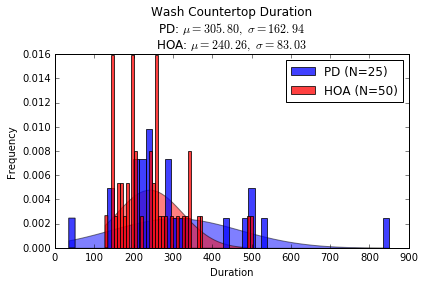

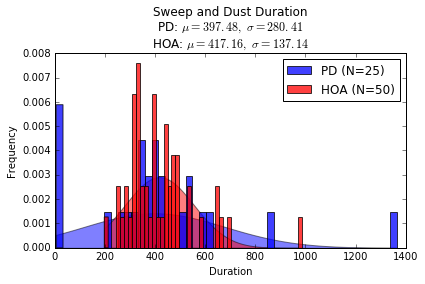

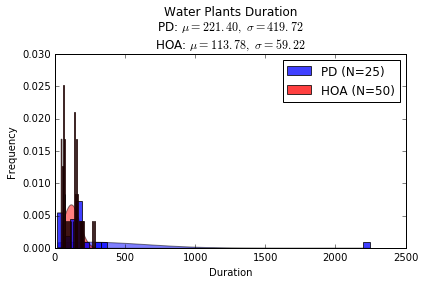

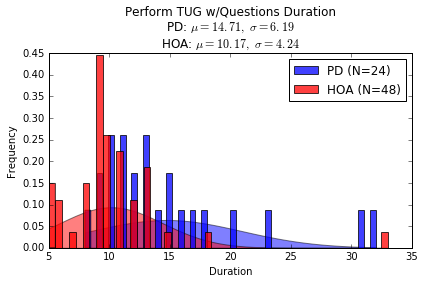

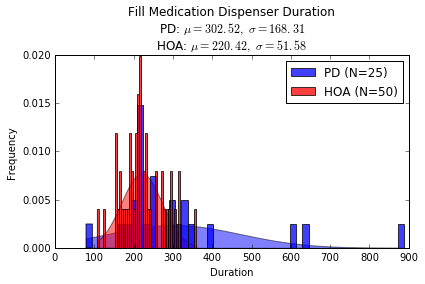

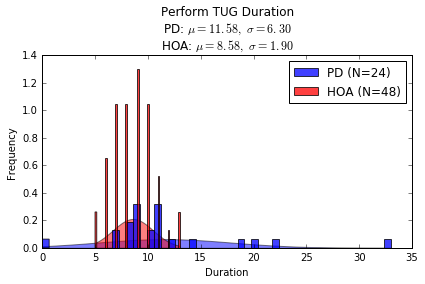

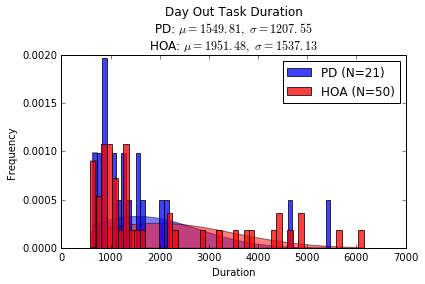

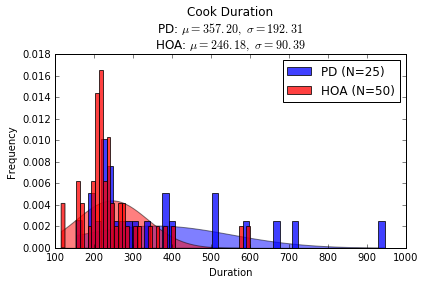

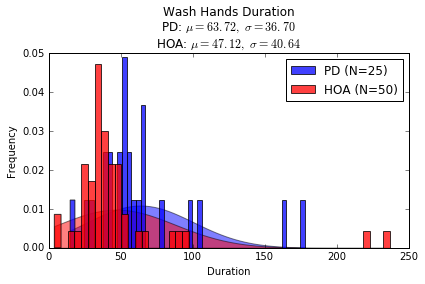

In [4]:
import matplotlib.mlab as mlab

def plot_histogram(task_name, distros):
    '''
    
    '''  
    colors = ['blue', 'red', 'orange']
    i = 0  
    fig = plt.figure()
    ax = fig.add_subplot(111)
    title = task_name + " Duration"
    for pop_name, x in distros.items():
        mu = np.mean(x)
        sigma = np.std(x)
        title += '\n%s: $ \mu=%.2lf,\ \sigma=%.2lf$' %(pop_name, mu, sigma)
        
        # number of bins = 50, normed = True for plotting pdf 
        n, bins, patches = ax.hist(x, 50, normed=True, facecolor=colors[i], alpha=0.75, label="%s (N=%d)" %(pop_name, len(x)))
        y = mlab.normpdf(bins, mu, sigma)
        
        rang = np.linspace(np.min(bins), np.max(bins), len(y))
        ax.fill_between(rang, 0, y, facecolor=colors[i], alpha=0.5)
        i += 1
        
    plt.xlabel("Duration")
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    ax.legend()
    
for task_name, distributions in task_distributions.items():
    plot_histogram(task_name, distributions)
plt.show()

## Summary
In this lesson, we aggregated data to perform subgroup analyses compare Parkinson's disease participants with age-matched, health older adults. We computed age mean and standard deviation for each group (confirming the "age-match") and we visualized each task's duration distribution to more easily compare and contrast the performance of each group. 

It may be interesting to know that the sequence of steps we performed in this lesson recreates the figure used in an IEEE Journal article: [Cook et al., 2015](http://ieeexplore.ieee.org/document/7181652/). Check it out:

<img src="https://raw.githubusercontent.com/gsprint23/aha/master/lessons/figures/pdvis_bhi_figure.png" width="800">